>[Classification with CNN](#scrollTo=MRY4WWV9YnSR)

>>[A: Preprocessing](#scrollTo=EGWe6AdcY93J)

>>[B: Implementation & setting hyperparameters](#scrollTo=WwWGzC0GZbVf)

>>[C: Training and evaluation](#scrollTo=N2WVFuwbncI6)

>>[D: Improving the model](#scrollTo=tT1DSaDAnhJj)

>>>[Testing 1 and 3 blocks](#scrollTo=h8-2wL1yny_o)

>>>[Adding BatchNormalization and Dropout](#scrollTo=qGA1UNCIntaq)

>[Transform learning](#scrollTo=lNcScL4etb6y)



In [ ]:
import numpy as np
from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
from keras.layers import Dropout, BatchNormalization

# Classification with CNN

In [ ]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


## A: Preprocessing

In [ ]:
X = np.concatenate((x_train, x_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

x_train, x_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=14)

x_test, x_val, y_test, y_val = train_test_split(x_temp, y_temp, test_size=0.5, random_state=14)


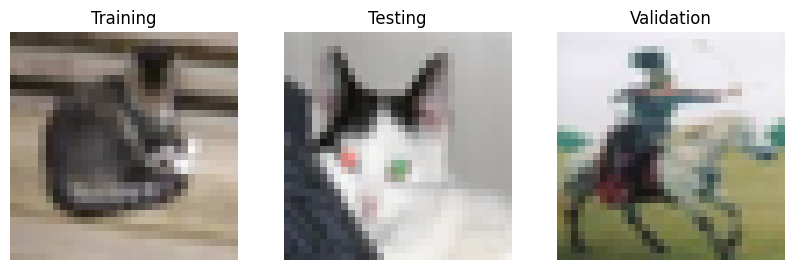

In [ ]:
sample_indices = [14, 14, 14]
sample_images = [x_train[sample_indices[0]], x_test[sample_indices[1]], x_val[sample_indices[2]]]


plt.figure(figsize=(10, 3))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.imshow(sample_images[i])
    plt.title(['Training', 'Testing', 'Validation'][i])
    plt.axis('off')
plt.show()

In [ ]:
# Normalize the data to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_val = x_val.astype('float32') / 255.0

# One-hot encoding for the labels
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
y_val = to_categorical(y_val, num_classes)

## B: Implementation & setting hyperparameters

In [ ]:
layers = [
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
]


model = Sequential(layers)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                   

## C: Training and evaluation

In [ ]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/10
1500/1500 [==============================] - 312s 207ms/step - loss: 1.3624 - accuracy: 0.5105 - val_loss: 1.0510 - val_accuracy: 0.6270
Epoch 2/10
1500/1500 [==============================] - 319s 212ms/step - loss: 0.9145 - accuracy: 0.6793 - val_loss: 0.8887 - val_accuracy: 0.6903
Epoch 3/10
1500/1500 [==============================] - 315s 210ms/step - loss: 0.7314 - accuracy: 0.7431 - val_loss: 0.8197 - val_accuracy: 0.7205
Epoch 4/10
1500/1500 [==============================] - 279s 186ms/step - loss: 0.6066 - accuracy: 0.7866 - val_loss: 0.8015 - val_accuracy: 0.7338
Epoch 5/10
1500/1500 [==============================] - 247s 165ms/step - loss: 0.5000 - accuracy: 0.8242 - val_loss: 0.8161 - val_accuracy: 0.7358
Epoch 6/10
1500/1500 [==============================] - 250s 167ms/step - loss: 0.4000 - accuracy: 0.8586 - val_loss: 0.9000 - val_accuracy: 0.7358
Epoch 7/10
1500/1500 [==============================] - 252s 168ms/step - loss: 0.3182 - accuracy: 0.8861 - val_

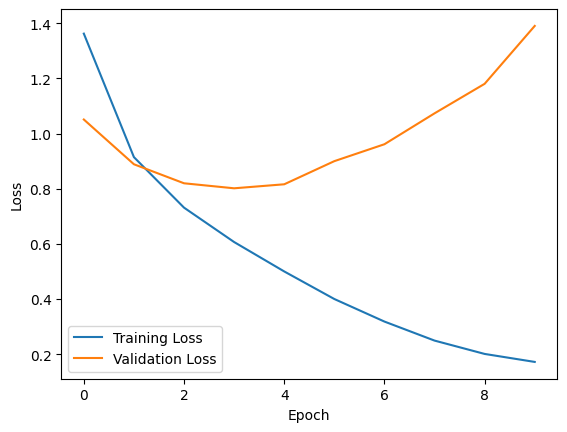

In [ ]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

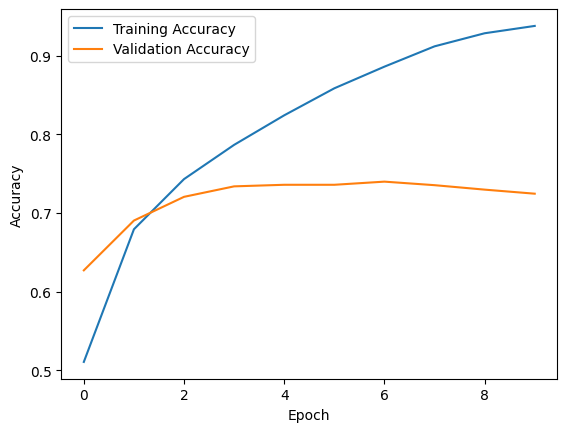

In [ ]:
train_acc = history.history['accuracy']

valid_acc = history.history['val_accuracy']

plt.plot(train_acc, label='Training Accuracy')
plt.plot(valid_acc, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

188/188 [==============================] - 8s 42ms/step - loss: 1.2776 - accuracy: 0.7307
Test Loss: 1.2776
Test Accuracy: 73.07%
188/188 [==============================] - 9s 46ms/step


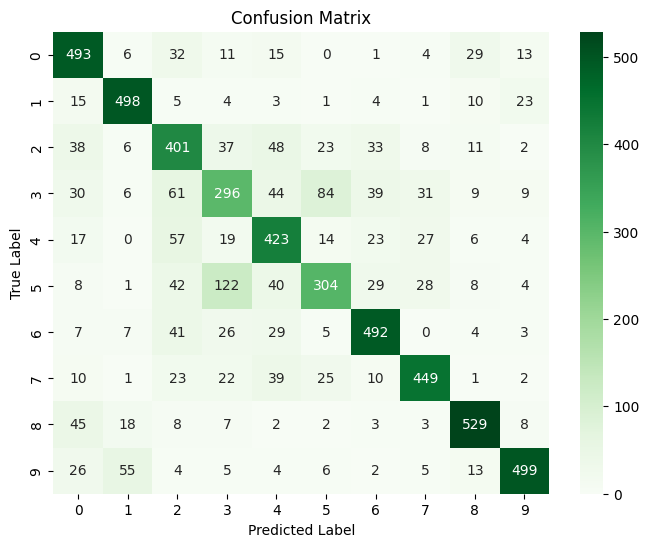

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy * 100:.2f}%')


y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## D: Improving the model

### Testing 1 and 3 blocks

In [ ]:
# Create models with different numbers of blocks
layers_1_block = [
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
]
model_1_block = Sequential(layers_1_block)
model_1_block.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_1_block = model_1_block.fit(x_train, y_train,
                                    epochs=10,
                                    batch_size=32,
                                    validation_data=(x_val, y_val))

Epoch 1/10
1500/1500 [==============================] - 158s 105ms/step - loss: 1.3229 - accuracy: 0.5295 - val_loss: 1.0948 - val_accuracy: 0.6102
Epoch 2/10
1500/1500 [==============================] - 146s 97ms/step - loss: 0.9484 - accuracy: 0.6661 - val_loss: 0.9665 - val_accuracy: 0.6670
Epoch 3/10
1500/1500 [==============================] - 147s 98ms/step - loss: 0.7955 - accuracy: 0.7215 - val_loss: 0.9635 - val_accuracy: 0.6748
Epoch 4/10
1500/1500 [==============================] - 147s 98ms/step - loss: 0.6755 - accuracy: 0.7610 - val_loss: 0.9623 - val_accuracy: 0.6737
Epoch 5/10
1500/1500 [==============================] - 146s 97ms/step - loss: 0.5587 - accuracy: 0.8029 - val_loss: 1.0219 - val_accuracy: 0.6758
Epoch 6/10
1500/1500 [==============================] - 145s 97ms/step - loss: 0.4456 - accuracy: 0.8440 - val_loss: 1.1556 - val_accuracy: 0.6790
Epoch 7/10
1500/1500 [==============================] - 146s 97ms/step - loss: 0.3424 - accuracy: 0.8806 - val_loss: 

In [ ]:
layers_3_block = [
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
]
model_3_blocks = Sequential(layers_3_block)
model_3_blocks.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_3_blocks = model_3_blocks.fit(x_train, y_train,
                                      epochs=10,
                                      batch_size=32,
                                      validation_data=(x_val, y_val))

Epoch 1/10
1500/1500 [==============================] - 366s 243ms/step - loss: 1.5161 - accuracy: 0.4411 - val_loss: 1.1740 - val_accuracy: 0.5702
Epoch 2/10
1500/1500 [==============================] - 354s 236ms/step - loss: 0.9966 - accuracy: 0.6460 - val_loss: 0.8904 - val_accuracy: 0.6900
Epoch 3/10
1500/1500 [==============================] - 355s 237ms/step - loss: 0.7936 - accuracy: 0.7195 - val_loss: 0.8122 - val_accuracy: 0.7215
Epoch 4/10
1500/1500 [==============================] - 357s 238ms/step - loss: 0.6567 - accuracy: 0.7690 - val_loss: 0.8859 - val_accuracy: 0.7047
Epoch 5/10
1500/1500 [==============================] - 358s 239ms/step - loss: 0.5579 - accuracy: 0.8040 - val_loss: 0.7360 - val_accuracy: 0.7467
Epoch 6/10
1500/1500 [==============================] - 356s 237ms/step - loss: 0.4729 - accuracy: 0.8339 - val_loss: 0.7765 - val_accuracy: 0.7590
Epoch 7/10
1500/1500 [==============================] - 356s 237ms/step - loss: 0.4058 - accuracy: 0.8551 - val_

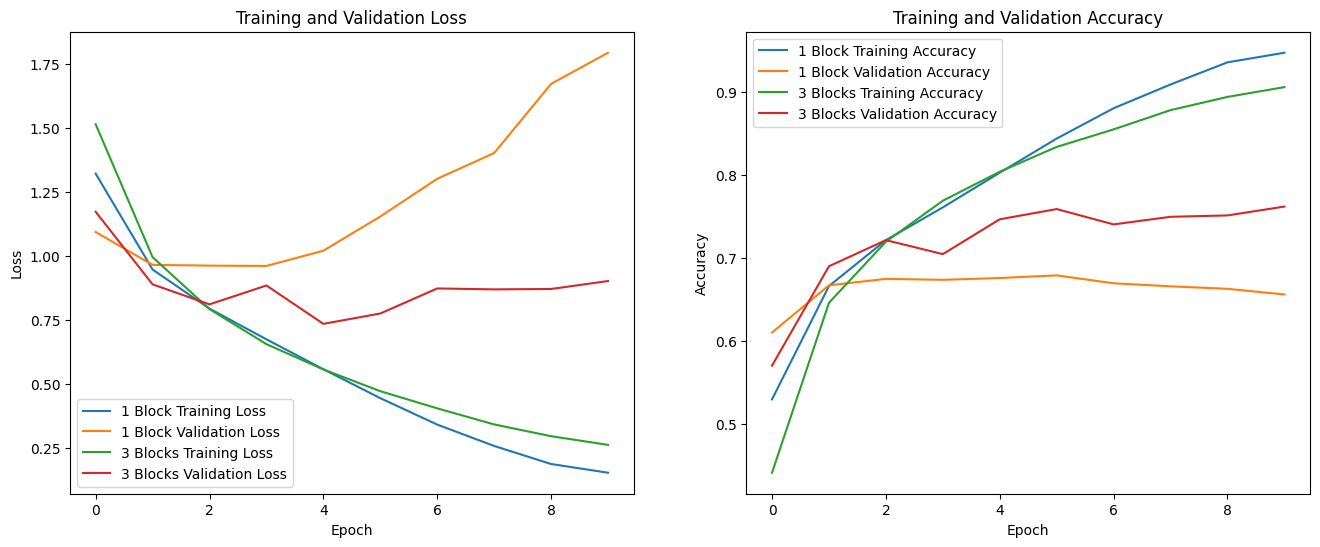

188/188 [==============================] - 14s 76ms/step - loss: 0.8868 - accuracy: 0.7662

Model with 1 Block:
Test Loss: 1.7773
Test Accuracy: 66.35%

Model with 3 Blocks:
Test Loss: 0.8868
Test Accuracy: 76.62%


In [ ]:
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.plot(history_1_block.history['loss'], label='1 Block Training Loss')
plt.plot(history_1_block.history['val_loss'], label='1 Block Validation Loss')
plt.plot(history_3_blocks.history['loss'], label='3 Blocks Training Loss')
plt.plot(history_3_blocks.history['val_loss'], label='3 Blocks Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.subplot(1, 2, 2)
plt.plot(history_1_block.history['accuracy'], label='1 Block Training Accuracy')
plt.plot(history_1_block.history['val_accuracy'], label='1 Block Validation Accuracy')
plt.plot(history_3_blocks.history['accuracy'], label='3 Blocks Training Accuracy')
plt.plot(history_3_blocks.history['val_accuracy'], label='3 Blocks Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()


loss_1_block, accuracy_1_block = model_1_block.evaluate(x_test, y_test)
loss_3_blocks, accuracy_3_blocks = model_3_blocks.evaluate(x_test, y_test)

print('\nModel with 1 Block:')
print(f'Test Loss: {loss_1_block:.4f}')
print(f'Test Accuracy: {accuracy_1_block * 100:.2f}%')

print('\nModel with 3 Blocks:')
print(f'Test Loss: {loss_3_blocks:.4f}')
print(f'Test Accuracy: {accuracy_3_blocks * 100:.2f}%')

188/188 [==============================] - 17s 91ms/step


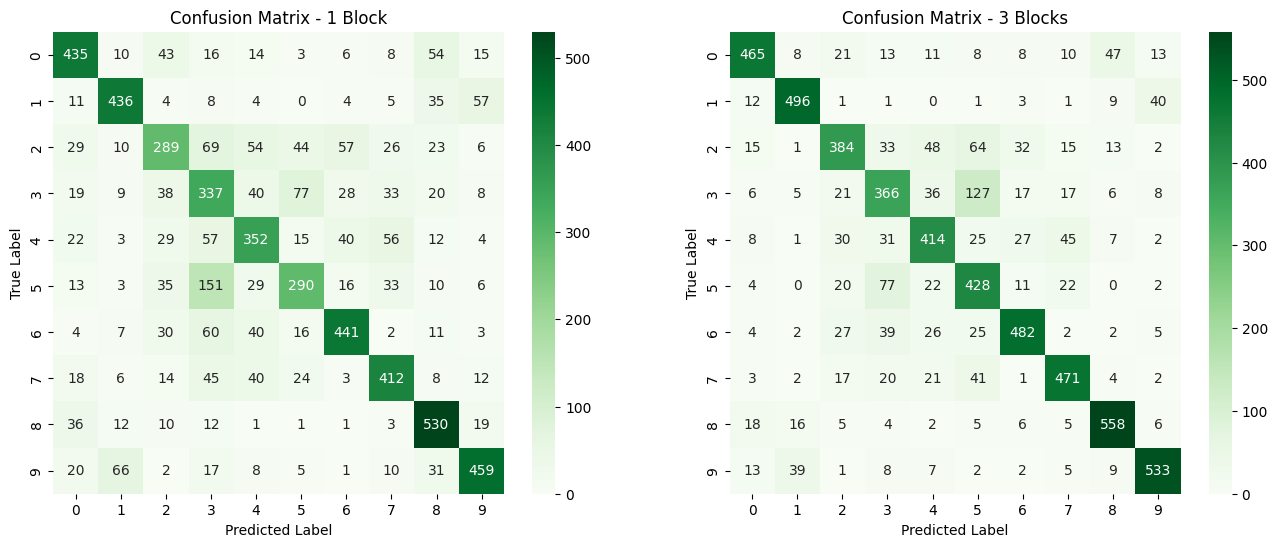

In [ ]:
y_pred_1_block = model_1_block.predict(x_test)
y_pred_classes_1_block = np.argmax(y_pred_1_block, axis=1)

y_pred_3_blocks = model_3_blocks.predict(x_test)
y_pred_classes_3_blocks = np.argmax(y_pred_3_blocks, axis=1)

conf_matrix_1_block = confusion_matrix(y_true_classes, y_pred_classes_1_block)
conf_matrix_3_blocks = confusion_matrix(y_true_classes, y_pred_classes_3_blocks)

plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_1_block, annot=True, fmt='d', cmap='Greens', xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix - 1 Block')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_3_blocks, annot=True, fmt='d', cmap='Greens', xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix - 3 Blocks')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.show()

### Adding BatchNormalization and Dropout

In [ ]:
# List of layers
new_layers = [
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')
]

# Create a Sequential model
new_model = Sequential(new_layers)


# Compile the model
new_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
new_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                        

In [ ]:
new_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_new = new_model.fit(x_train, y_train,
                                      epochs=10,
                                      batch_size=32,
                                      validation_data=(x_val, y_val))

Epoch 1/10
1500/1500 [==============================] - 24s 9ms/step - loss: 1.5026 - accuracy: 0.4810 - val_loss: 1.1773 - val_accuracy: 0.5910
Epoch 2/10
1500/1500 [==============================] - 13s 9ms/step - loss: 1.0052 - accuracy: 0.6487 - val_loss: 1.0744 - val_accuracy: 0.6360
Epoch 3/10
1500/1500 [==============================] - 14s 10ms/step - loss: 0.8445 - accuracy: 0.7103 - val_loss: 0.7271 - val_accuracy: 0.7495
Epoch 4/10
1500/1500 [==============================] - 25s 17ms/step - loss: 0.7578 - accuracy: 0.7400 - val_loss: 0.7399 - val_accuracy: 0.7460
Epoch 5/10
1500/1500 [==============================] - 13s 9ms/step - loss: 0.6789 - accuracy: 0.7701 - val_loss: 0.9740 - val_accuracy: 0.6810
Epoch 6/10
1500/1500 [==============================] - 13s 8ms/step - loss: 0.6259 - accuracy: 0.7861 - val_loss: 0.6105 - val_accuracy: 0.7882
Epoch 7/10
1500/1500 [==============================] - 13s 9ms/step - loss: 0.5732 - accuracy: 0.8064 - val_loss: 0.5505 - val_

<Figure size 1600x600 with 0 Axes>

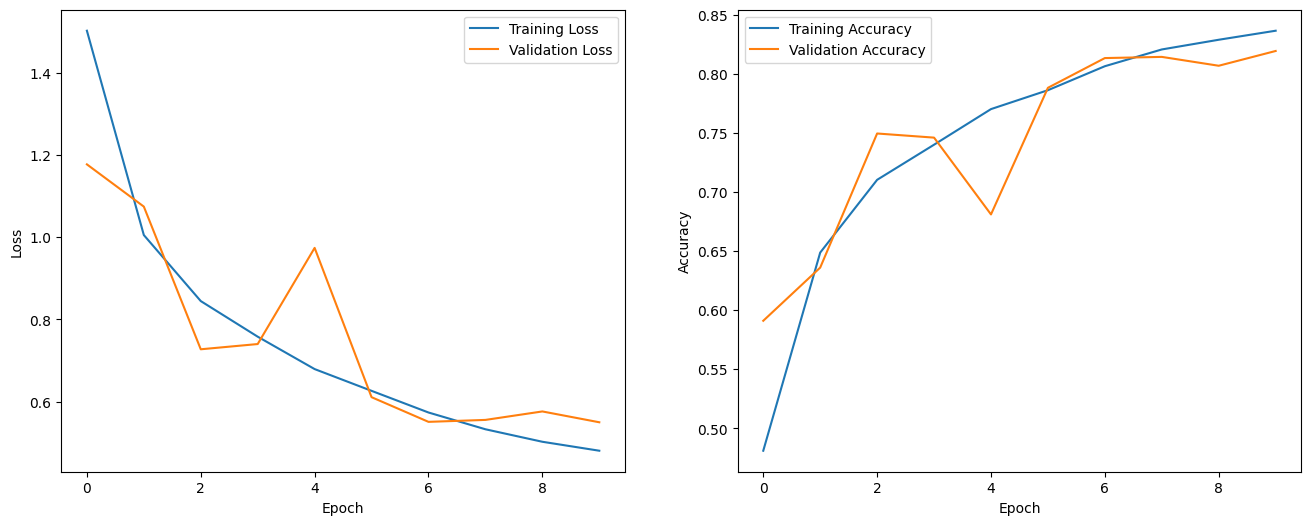

In [ ]:
plt.figure(figsize=(16, 6))

training_loss = history_new.history['loss']
validation_loss = history_new.history['val_loss']

training_acc = history_new.history['accuracy']
validation_acc = history_new.history['val_accuracy']

plt.figure(figsize=(16,6))
plt.subplot(1, 2, 1)
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(training_acc, label='Training Accuracy')
plt.plot(validation_acc, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

188/188 [==============================] - 1s 7ms/step - loss: 0.5278 - accuracy: 0.8187
Test Loss: 0.5278
Test Accuracy: 81.87%
188/188 [==============================] - 1s 2ms/step


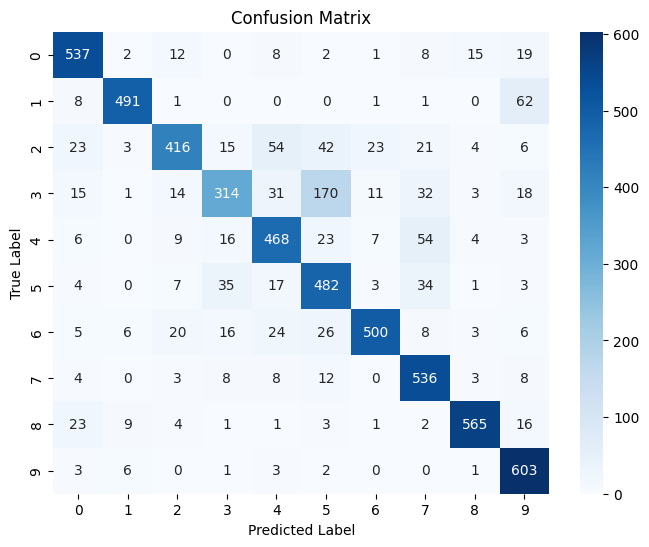

In [ ]:
loss, accuracy = new_model.evaluate(x_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy * 100:.2f}%')

y_pred = new_model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Transform learning

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import tensorflow_datasets as tfds
(training_set, validation_set, test_set), dataset_info = tfds.load(
    'tf_flowers',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset tf_flowers downloaded and prepared to /root/tensorflow_datasets/tf_flowers/3.0.1. Subsequent calls will reuse this data.


In [ ]:
def format_image(image, label):
    image = tf.image.resize(image, (IMAGE_RES, IMAGE_RES))/255.0
    return image, label

num_training_examples = len(training_set)
IMAGE_RES = 224
BATCH_SIZE = 32

train_batches = training_set.shuffle(num_training_examples//4).map(format_image).batch(BATCH_SIZE).prefetch(1)
validation_batches = validation_set.map(format_image).batch(BATCH_SIZE).prefetch(1)
test_batches = test_set.map(format_image).batch(BATCH_SIZE).prefetch(1)

In [ ]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

base_model.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

Add two more Dense Layers

In [ ]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(5, activation='softmax')(x)

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

model.summary()

history_frozen = model.fit(train_batches, epochs=10, validation_data=validation_batches)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

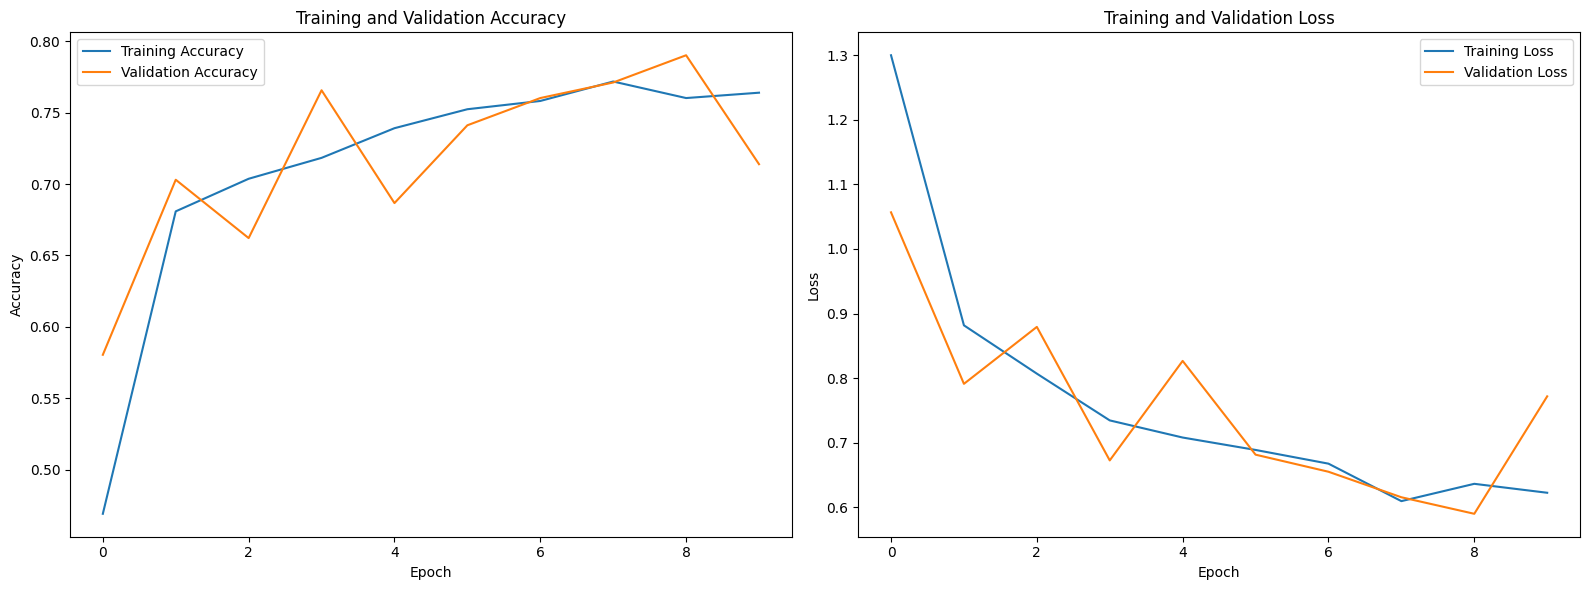

In [ ]:
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.plot(history_frozen.history['accuracy'], label='Training Accuracy')
plt.plot(history_frozen.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_frozen.history['loss'], label='Training Loss')
plt.plot(history_frozen.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

12/12 [==============================] - 2s 119ms/step - loss: 0.6532 - accuracy: 0.7684
Test Loss: 0.6532
Test Accuracy: 0.7684
12/12 [==============================] - 2s 123ms/step


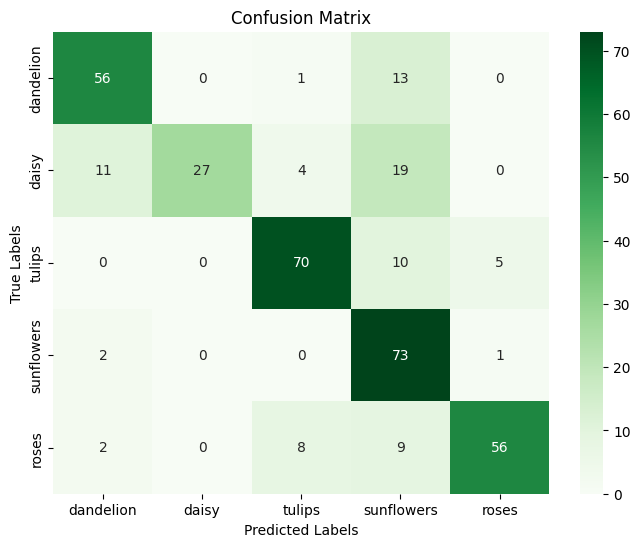

              precision    recall  f1-score   support

   dandelion       0.79      0.80      0.79        70
       daisy       1.00      0.44      0.61        61
      tulips       0.84      0.82      0.83        85
  sunflowers       0.59      0.96      0.73        76
       roses       0.90      0.75      0.82        75

    accuracy                           0.77       367
   macro avg       0.82      0.75      0.76       367
weighted avg       0.82      0.77      0.76       367



In [ ]:
test_loss, test_accuracy = model.evaluate(test_batches)

print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

# Predict the classes for the test set
y_pred = np.argmax(model.predict(test_batches), axis=1)
y_true = np.concatenate([y.numpy() for _, y in test_batches], axis=0)


conf_mat = confusion_matrix(y_true, y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Greens', xticklabels=dataset_info.features['label'].names,
            yticklabels=dataset_info.features['label'].names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_true, y_pred, target_names=dataset_info.features['label'].names))

In [ ]:
for layer in base_model.layers:
    layer.trainable = True

model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

history_unfrozen = model.fit(train_batches, epochs=5, validation_data=validation_batches)

Epoch 1/5
92/92 [==============================] - 59s 472ms/step - loss: nan - accuracy: 0.2537 - val_loss: nan - val_accuracy: 0.2425
Epoch 2/5
92/92 [==============================] - 34s 369ms/step - loss: nan - accuracy: 0.2517 - val_loss: nan - val_accuracy: 0.2425
Epoch 3/5
92/92 [==============================] - 34s 370ms/step - loss: nan - accuracy: 0.2517 - val_loss: nan - val_accuracy: 0.2425
Epoch 4/5
92/92 [==============================] - 34s 371ms/step - loss: nan - accuracy: 0.2517 - val_loss: nan - val_accuracy: 0.2425
Epoch 5/5
92/92 [==============================] - 34s 371ms/step - loss: nan - accuracy: 0.2517 - val_loss: nan - val_accuracy: 0.2425


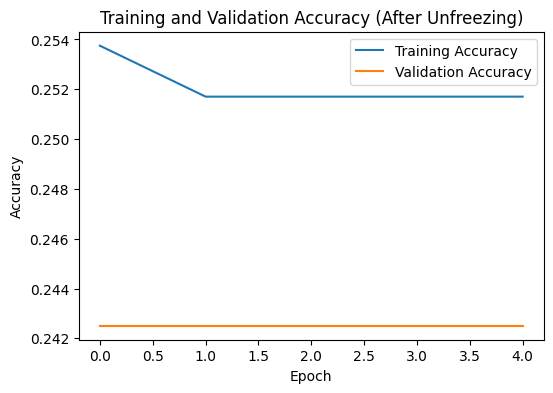

In [ ]:
plt.figure(figsize=(6, 4))

plt.plot(history_unfrozen.history['accuracy'], label='Training Accuracy')
plt.plot(history_unfrozen.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy (After Unfreezing)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()